# 📖 Introducción

**Introducción** <br>
En este trabajo se aborda el análisis de la relación entre el salario de los empleados del área de Data Science y su perfil laboral. Se busca responder preguntas como ¿Cómo influye el nivel de experiencia en el salario? ¿Hay diferencias salariales entre empleados que trabajan de forma remota y los que no?<br>

**Audiencia**<br>
Este estudio está dirigido a empresas que buscan conocer la tendencia salarial de los empleados en el área de Data Science y a los empleados que buscan negociar mejores salarios en función de su perfil. Además, podría ser de utilidad para estudiantes que buscan orientación sobre qué áreas de estudio podrían ser más rentables a largo plazo y para los profesionales que buscan explorar otras áreas de trabajo.<br>

**Temática** <br>
La temática que se aborda en este trabajo es la relación entre el salario de los empleados del área de Data Science y su perfil laboral, teniendo en cuenta variables como el nivel de experiencia, la ubicación geográfica, el tipo de empresa en la que trabajan y si desempeñan su trabajo de forma remota o presencial. El objetivo principal es obtener información útil y precisa para las empresas y empleados que buscan tomar decisiones basadas en datos en cuanto a los salarios del área de Data Science.<br> <br>

### 📜 **Storytelling**


##### **Contexto Comercial:** Somos una empresa que brinda servicios de consultoría en el área de recursos humanos. Uno de nuestros clientes es una compañía de tecnología que está interesada en mejorar su estrategia de retención de talentos.

##### **Problema Comercial**: Nuestro trabajo es analizar el conjunto de datos proporcionados por la empresa cliente y encontrar patrones y tendencias que puedan ayudar a mejorar la retención de talentos. En particular, queremos entender cómo las condiciones laborales (como el salario, el tipo de contrato, la ubicación, etc.) influyen en la decisión de los empleados de permanecer en la empresa o buscar oportunidades en otro lugar.

#### **Objetivo**: El objetivo de este análisis es proporcionar una exploración detallada de los datos y brindar información precisa al empleador para responder a sus preguntas y obtener información valiosa sobre los salarios en la empresa.

**Preguntas**
```
a) El nivel de salario aumenta con base en la cantidad de experiencia que posea el empleado?
b) Los salarios aumentaron o decrecieron con el paso de los años?
c) Pagamos mejor a los trabajadores en remoto, o los presenciales?
d) Que área específica pagamos más?
e) Hay más trabajadores en remoto, o presenciales?
f) Las compañías grandes pagan más?
g) Aumenta según el tipo de contratación?
h) Donde reside el empleado, tiene variabilidad en los salarios?
```


#### Estas preguntas serán nuestro punto de partida para explorar los datos y responder a las inquietudes de nuestro cliente. Con ellas como guía, buscaremos obtener insights valiosos y finalizar cualquier duda o consulta que pueda tener

# ✈️Contexto analítico

Se observan las librerías a utilizar para el EDA. 

In [160]:
%pip install mlxtend --quiet 
%pip install plotly_express==0.4.0 --quiet 
%pip install xgboost --quiet
%pip install tabulate --quiet;


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\Users\leand\miniconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\Users\leand\miniconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\Users\leand\miniconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\Users\leand\miniconda3\python.exe -m pip install [options] [-e] <local project path> ...
  c:\Users\leand\miniconda3\python.exe -m pip install [options] <archive url/path> ...

no such option: --quiet;


In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import scipy
import plotly.express as px
import warnings
from tabulate import tabulate

## 💡 Data Adquisition

In [162]:
%cd C:\Users\leand\Desktop\Data Science\Excel
df_salary = pd.read_csv("datascience_salaries.csv",sep=',')

C:\Users\leand\Desktop\Data Science\Excel


#### El dataset proporcionado por la empresa incluye información sobre el salario y las condiciones laborales de los empleados en el campo de la Ciencia de Datos. El dataset está en formato CSV y consta de varias columnas que contienen detalles sobre el año de trabajo, el nivel de experiencia, el tipo de contrato, el título del trabajo, el salario y la moneda utilizada, así como el salario en dólares. También se incluyen detalles sobre la residencia del empleado, si trabaja en remoto, híbrido o de forma presencial, la localización o región de la empresa y el tamaño de la empresa. <br>
#### Debajo, una breve descripcion de las columnas del dataset.

* **Work_Year**: Año de trabajo.<br>
* **Experience_Level**: Nivel de experiencia.<br>
* **Employment_Type**: Tipo de contratacion.<br>
* **Job_Title**: Titulo del trabajo.<br>
* **Salary**: Salario.<br>
* **Salary_Currency**: Tipo de moneda utilizada en el salario.<br>
* **Salary_In_USD**: Salario en dolares.<br>
* **Emplyee_Recience**: Recidencia del empleado.<br>
* **Remote_Ratio**: Si trabaja en remoto, hibrido o precencial.<br>
* **Company_Location**: Localizacion o region de la empresa.<br>
* **Company_Size**: Tamaño de la empresa.<br>

In [163]:
df_salary.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# 🔎Data Wranling

En esa examinacion, se han realizado los ajustes de limpieza necesarios para dejar listos los datos para análisis. <br>
Detallaremos los cambios a continuación:<br>
* Se han analizado los datos.
  * Valores nulos.
  * Valores duplicados.
* Se han detallado de mejor manera algunas columnas para mejorar la claridad en el análisis.
* Se ha eliminado la columna de index, dado que no es necesario.
* Se ha eliminado la columna en salario en distintas monedas, ya que trabajaremos enteramente con dolares americanos. Junto con la columna de divisa.
* Se ha realizado una copia para trabajar con un encoder (categoricas a numericas), y realizamos otra copia para los algoritmos de aprendizaje automático.
* Se ha realizado una escala logarítmica dado que los salarios en dolares son muy altos.
* Limitaremos los valores de residencia aquellos que sean mayor de 20 al momento de trabajar con los algoritmos de aprendizaje automatico

### Valores nulos

In [164]:
df_salary.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [165]:
df_salary.isna().any()

Unnamed: 0            False
work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

Nos cercioramos de que el dataset no tenga datos NaN
Y en conclusion determinamos que el dataset no tiene ni valores nulos, ni duplicados.

### Reclasificacion

In [166]:
df_salary['experience_level'] = df_salary['experience_level'].replace('EN','Junior') 
df_salary['experience_level'] = df_salary['experience_level'].replace('MI','Mid_Junior')
df_salary['experience_level'] = df_salary['experience_level'].replace('SE','Senior')
df_salary['experience_level'] = df_salary['experience_level'].replace('EX','Ejecutivo')

In [167]:
df_salary['employment_type'] = df_salary['employment_type'].replace('PT','Medio_Tiempo')
df_salary['employment_type'] = df_salary['employment_type'].replace('FT','Full_Time')
df_salary['employment_type'] = df_salary['employment_type'].replace('CT','Contrato')
df_salary['employment_type'] = df_salary['employment_type'].replace('FL','Freelance')

In [168]:
df_salary = df_salary.rename(columns={
    'work_year': 'Anio_Laboral',
    'experience_level': 'Nivel_de_experiencia',
    'employment_type': 'Tipo_de_contrato',
    'job_title': 'Titulo_de_trabajo',
    'salary_in_usd': 'Salario_en_dolares',
    'employee_residence': 'Residencia_del_empleado',
    'remote_ratio': 'Ratio_remoto',
    'company_location': 'Localizacion_de_la_compania',
    'company_size': 'Tamanio_de_compania'
})


In [169]:
np.log(df_salary["Salario_en_dolares"])

0     11.29
1     12.47
2     11.60
3      9.90
4     11.92
       ... 
602   11.94
603   11.74
604   11.77
605   11.92
606   12.21
Name: Salario_en_dolares, Length: 607, dtype: float64

### Eliminacion de la columnas

In [170]:
del df_salary['Unnamed: 0']

In [171]:
del df_salary['salary']
del df_salary['salary_currency']

# 🔎 DataWranling enfocado a MachineLearning

En esta ocasion, se han realizado los ajustes de limpieza necesarios para dejar los datos listos para la aplicación de algoritmos de aprendizaje automático. Detallaremos los cambios a continuación: <br>
Detallaremos los cambios a continuación:<br>
* Se ha aplicado un modelo de codificación One Hot.
* Sobre la residencia del empleado, hemos agrupado las categorías en [US] y [NO US], representando las observaciones que están dentro y fuera de Estados Unidos por motivos de equilibrio.
* Sobre el tipo de contrato, hemos agrupado las categorías [Full_time] y [No_FT], representando las observaciones que están a tiempo completo y las que no.
* Al ver la cantidad de observaciones en la categoría de fulltime, he decidido no utilizar estas categorías, dado que no representan nada en mi conjunto de datos; el 94% de las observaciones están bajo Full_Time.
* Se ha generado la columna menos_experiencia y mas_experiencia para agrupar las categorías [Senior - Ejecutivo] y [Junior - Mid_Junior] respectivamente, para ayudar con el equilibrio de los datos.

### One hot encoder y arreglos

In [172]:
df_salaryML_OneHotEncoder = df_salary.copy()

#### Residencia Empleado.

In [173]:
df_salaryML_OneHotEncoder['Residencia_del_empleado'] = df_salaryML_OneHotEncoder['Residencia_del_empleado'].apply(lambda x: x if x == 'US' else 'No_US')

#### Tipo de contratacion


In [174]:
df_salaryML_OneHotEncoder['Tipo_de_contrato'] = df_salaryML_OneHotEncoder['Tipo_de_contrato'].apply(lambda x: x if x == 'Full_Time' else 'No_FT')

#### mas y menos experiencia

In [175]:
df_salaryML_OneHotEncoder['mas_experiencia'] = np.where((df_salaryML_OneHotEncoder['Nivel_de_experiencia'] == 'Senior') | (df_salaryML_OneHotEncoder['Nivel_de_experiencia'] == 'Ejecutivo'), 1, 0)
df_salaryML_OneHotEncoder['menos_experiencia'] = np.where((df_salaryML_OneHotEncoder['Nivel_de_experiencia'] == 'Mid_Junior') | (df_salaryML_OneHotEncoder['Nivel_de_experiencia'] == 'Junior'), 1, 0)
df_salaryML_OneHotEncoder = df_salaryML_OneHotEncoder.drop('Nivel_de_experiencia', axis=1)


#### Anio laboral

In [176]:
df_salaryML_OneHotEncoder['Anio_2022'] = np.where(df_salaryML_OneHotEncoder['Anio_Laboral'] == 2022, 1, 0)
df_salaryML_OneHotEncoder['Anterior_2022'] = np.where(df_salaryML_OneHotEncoder['Anio_Laboral'] < 2022, 1, 0)

In [177]:
df_salaryML_OneHotEncoder.head()

,Anio_Laboral,Tipo_de_contrato,Titulo_de_trabajo,Salario_en_dolares,Residencia_del_empleado,Ratio_remoto,Localizacion_de_la_compania,Tamanio_de_compania,mas_experiencia,menos_experiencia,Anio_2022,Anterior_2022
0,2020,Full_Time,Data Scientist,79833,No_US,0,DE,L,0,1,0,1
1,2020,Full_Time,Machine Learning Scientist,260000,No_US,0,JP,S,1,0,0,1
2,2020,Full_Time,Big Data Engineer,109024,No_US,50,GB,M,1,0,0,1
3,2020,Full_Time,Product Data Analyst,20000,No_US,0,HN,S,0,1,0,1
4,2020,Full_Time,Machine Learning Engineer,150000,US,50,US,L,1,0,0,1


#### OneHotEncoder

In [178]:
from sklearn.preprocessing import OneHotEncoder

# Crear una instancia de OneHotEncoder
encoderOHE = OneHotEncoder()

# Ajustar y transformar los datos
encoded_data = encoderOHE.fit_transform(df_salaryML_OneHotEncoder[['Tipo_de_contrato', 'Residencia_del_empleado', 'Tamanio_de_compania']])

# Obtener las categorías únicas para cada columna
feature_names = encoderOHE.get_feature_names_out(['Tipo_de_contrato', 'Residencia_del_empleado', 'Tamanio_de_compania'])

# Convertir el resultado a un DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=feature_names)

# Concatenar el DataFrame codificado con el DataFrame original
df_encoded = pd.concat([df_salaryML_OneHotEncoder, encoded_df], axis=1)


In [179]:
df_encoded.head()

,Anio_Laboral,Tipo_de_contrato,Titulo_de_trabajo,Salario_en_dolares,Residencia_del_empleado,Ratio_remoto,Localizacion_de_la_compania,Tamanio_de_compania,mas_experiencia,menos_experiencia,Anio_2022,Anterior_2022,Tipo_de_contrato_Full_Time,Tipo_de_contrato_No_FT,Residencia_del_empleado_No_US,Residencia_del_empleado_US,Tamanio_de_compania_L,Tamanio_de_compania_M,Tamanio_de_compania_S
0,2020,Full_Time,Data Scientist,79833,No_US,0,DE,L,0,1,0,1,1.00,0.00,1.00,0.00,1.00,0.00,0.00
1,2020,Full_Time,Machine Learning Scientist,260000,No_US,0,JP,S,1,0,0,1,1.00,0.00,1.00,0.00,0.00,0.00,1.00
2,2020,Full_Time,Big Data Engineer,109024,No_US,50,GB,M,1,0,0,1,1.00,0.00,1.00,0.00,0.00,1.00,0.00
3,2020,Full_Time,Product Data Analyst,20000,No_US,0,HN,S,0,1,0,1,1.00,0.00,1.00,0.00,0.00,0.00,1.00
4,2020,Full_Time,Machine Learning Engineer,150000,US,50,US,L,1,0,0,1,1.00,0.00,0.00,1.00,1.00,0.00,0.00


In [180]:
columns_to_drop = ['Anio_Laboral', 'Tipo_de_contrato', 'Titulo_de_trabajo', 'Residencia_del_empleado', 'Ratio_remoto', 'Localizacion_de_la_compania', 'Tamanio_de_compania']
df_encoded = df_encoded.drop(columns=columns_to_drop)


In [181]:
df_encoded = df_encoded.drop('Tipo_de_contrato_Full_Time', axis=1)
df_encoded = df_encoded.drop('Tipo_de_contrato_No_FT', axis=1)

In [182]:
df_encoded.head()

,Salario_en_dolares,mas_experiencia,menos_experiencia,Anio_2022,Anterior_2022,Residencia_del_empleado_No_US,Residencia_del_empleado_US,Tamanio_de_compania_L,Tamanio_de_compania_M,Tamanio_de_compania_S
0,79833,0,1,0,1,1.00,0.00,1.00,0.00,0.00
1,260000,1,0,0,1,1.00,0.00,0.00,0.00,1.00
2,109024,1,0,0,1,1.00,0.00,0.00,1.00,0.00
3,20000,0,1,0,1,1.00,0.00,0.00,0.00,1.00
4,150000,1,0,0,1,0.00,1.00,1.00,0.00,0.00


# 🤖 Comienzo el desarrollo, comprobacion de valores nulos y duplicados

#### Comienzo el desarrollo de los datos, comenzamos con un encabezado que nos traera los datos en el DF.

In [183]:
table = tabulate(df_salary.info(), headers=["Columna", "No Nulos", "Tipo de datos"], tablefmt="pipe", showindex=False)
print(table)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Anio_Laboral                 607 non-null    int64 
 1   Nivel_de_experiencia         607 non-null    object
 2   Tipo_de_contrato             607 non-null    object
 3   Titulo_de_trabajo            607 non-null    object
 4   Salario_en_dolares           607 non-null    int64 
 5   Residencia_del_empleado      607 non-null    object
 6   Ratio_remoto                 607 non-null    int64 
 7   Localizacion_de_la_compania  607 non-null    object
 8   Tamanio_de_compania          607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB
| Columna   | No Nulos   | Tipo de datos   |
|-----------|------------|-----------------|


In [184]:
df_salary.isnull().sum()

Anio_Laboral                   0
Nivel_de_experiencia           0
Tipo_de_contrato               0
Titulo_de_trabajo              0
Salario_en_dolares             0
Residencia_del_empleado        0
Ratio_remoto                   0
Localizacion_de_la_compania    0
Tamanio_de_compania            0
dtype: int64

In [185]:
df_salary.isna().any()

Anio_Laboral                   False
Nivel_de_experiencia           False
Tipo_de_contrato               False
Titulo_de_trabajo              False
Salario_en_dolares             False
Residencia_del_empleado        False
Ratio_remoto                   False
Localizacion_de_la_compania    False
Tamanio_de_compania            False
dtype: bool

Nos cercioramos de que el dataset no tenga datos NaN
Y en conclusion determinamos que el dataset no tiene ni valores nulos, ni duplicados.

In [186]:
(df_salary == 0).sum()


Anio_Laboral                     0
Nivel_de_experiencia             0
Tipo_de_contrato                 0
Titulo_de_trabajo                0
Salario_en_dolares               0
Residencia_del_empleado          0
Ratio_remoto                   127
Localizacion_de_la_compania      0
Tamanio_de_compania              0
dtype: int64

In [187]:
pd.options.display.float_format = "{:.2f}".format
print(df_salary['Salario_en_dolares'].describe())


count      607.00
mean    112297.87
std      70957.26
min       2859.00
25%      62726.00
50%     101570.00
75%     150000.00
max     600000.00
Name: Salario_en_dolares, dtype: float64


In [188]:
df_salary['Salario_en_dolares'].agg(["min", "mean", "max"]).T

min      2859.00
mean   112297.87
max    600000.00
Name: Salario_en_dolares, dtype: float64

# 📊Comienzo a responder las preguntas del cliente (EDA)🔭

## 📈 Analisis Univariado

### Nivel de Experiencia

In [189]:
experience_level = df_salary['Nivel_de_experiencia'].value_counts()
px.bar(y=experience_level.values, x=experience_level.index, color_discrete_sequence=px.colors.sequential.deep)

Podemos ver que dentro de esta columna, senior predomina los datos. Por siguiente tenemos Midlevel, junior y finalmente Executive level. Aun que no sorprenda, la mayoría de nuestros científicos de datos son nivel Senior o semi senior, y lo mas raro de encontrar seria aquellos en posición de ejecutivos.

### Titulo de trabajo

In [190]:
print('Hay actualmente:', df_salary['Titulo_de_trabajo'].value_counts().size, 'trabajos en la columna Titulo_de_trabajo')

Hay actualmente: 50 trabajos en la columna Titulo_de_trabajo


In [191]:
top10_trabajos = df_salary['Titulo_de_trabajo'].value_counts()[:10]
px.bar(y=top10_trabajos.values, x=top10_trabajos.index, color = top10_trabajos.index, color_discrete_sequence=px.colors.sequential.deep)

Podemos darnos cuenta de que Data scientist, Data Engineer y Data Analyst predominan la columna. Esto no nos da tanta información, pero si nos brinda cierto conocimiento sobre las posiciones mas populares.

### Tipo de Contrato

In [192]:
fig = px.histogram(df_salary, x='Tipo_de_contrato')

fig.update_layout(  
    title='Conteo de Tipo de Contrato',
    xaxis_title='Tipo de Contrato',
    yaxis_title='Conteo'
)

fig.show()

Luego de esta exploracion de datos, podemos darnos cuenta que el 96.86% de los datos, se encuentran en full-time. De esta manera, cambiaremos el enfoque de trabajo, y trabajaremos unicamente con la columna full-time. Y posterior mente la eliminaremos para evitar el sesgo de datos al momento de realizar los modelos de machine learning.

Al analizar la columna de "Residencia_del_empleado" y la ubicación de la compañía, observamos que hay una gran cantidad de datos en la categoría "Full-Time". Esto sugiere que existe una fuerte correlación entre la ubicación del empleado y la ubicación de la compañía, ya que es probable que ambos estén en el mismo lugar cuando se trata de contratos de tiempo completo. Como resultado, al construir un modelo de aprendizaje automático, esta variable puede descartarse debido a su alta correlación y falta de variabilidad, lo cual puede no aportar información significativa para predecir el salario.

### Residencia del empleado

Podemos observar que la mayoría de los datos de nuestros empleados están basados en los Estados Unidos. Sin embargo, esta concentración de datos puede plantear un sesgo en nuestros modelos de aprendizaje automático, dado que la diversidad geográfica es importante para una mayor precisión. Es necesario tener en cuenta este sesgo y buscar maneras de mitigarlo, ya que puede afectar la generalización de nuestros modelos en otras regiones geográficas.

In [193]:
residence = df_salary['Residencia_del_empleado'].value_counts()
top10_employee_location = residence[:10]
px.bar(y=top10_employee_location.values, x=top10_employee_location.index, color = top10_employee_location.index, color_discrete_sequence=px.colors.sequential.deep)

### Año Laboral


En el conjunto de datos que estamos utilizando, podemos observar que la mayoría de las observaciones corresponden a los años 2021 y 2022. Si bien existe cierta preocupación por la ausencia de información del año 2020, decidimos enfocarnos en los datos disponibles de los últimos dos años para obtener un análisis más robusto y estable. De esta manera, podemos estar seguros de que las tendencias y patrones que encontramos son más representativos y precisos de la situación actual.

In [194]:
workyear = df_salary['Anio_Laboral'].value_counts()
px.pie(values=workyear.values, names=workyear.index ,color_discrete_sequence=px.colors.sequential.deep )

### Salary in usd

Podemos observar que los salarios en promedio se encuentran entre los 62.000 y los 150.000 dólares, con una mediana de 101.000 dólares. También podemos notar que existen algunos outliers que cobran salarios mucho más altos, llegando hasta los 600.000 dólares.

In [195]:
fig1 = px.box(y=df_salary['Salario_en_dolares'])
fig1.show()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

### Remote ratio

En este caso, podemos observar que hay muchos más casos de personas trabajando de forma totalmente remota que de forma parcial o presencial. Esto puede deberse a que en las posiciones de Data Scientist, la presencia física no es tan crucial, ya que se trata de posiciones que requieren principalmente conocimientos de negocio y habilidades en programación, así como la implementación de buenas prácticas.

In [196]:
remote_ratio = df_salary['Ratio_remoto'].value_counts()
px.pie(values=remote_ratio.values, names=remote_ratio.index ,color_discrete_sequence=px.colors.sequential.deep )

### Tamaño de compañia

Al analizar los datos, podemos notar que las compañías de tamaño mediano tienen la mayor cantidad de empleados, seguidas por las compañías grandes y, por último, las pequeñas o "small".

In [197]:
tamanio_compañia = df_salary['Tamanio_de_compania'].value_counts()
px.pie(values=tamanio_compañia.values, names=tamanio_compañia.index ,color_discrete_sequence=px.colors.qualitative.Pastel)

## 📈 Analisis Bivariado y respuestas a las preguntas

### El nivel de salario aumenta en base a la cantidad de experiencia?


Comienzo por utilizar un boxplot para graficar el nivel de salario en relación con el nivel de experiencia. La respuesta clara: a medida que aumenta la experiencia, también lo hacen los salarios. En este boxplot se puede apreciar que el nivel salarial más bajo se encuentra en la categoría de entry, seguida por mid junior, y posteriormente senior y Ejecutivo. 
Siendo la media del Junior unos 56k y la media de un ejecutivo 171k.

In [198]:
boxplotmedian = df_salary.groupby('Nivel_de_experiencia')['Salario_en_dolares'].median().sort_values()
px.box(df_salary, x='Nivel_de_experiencia', y='Salario_en_dolares', category_orders={"Nivel_de_experiencia": boxplotmedian.index})

### Salarios en medida de los años

Al momento de graficar los datos de los salarios en relacion de los años, podemos darnos cuenta de un aumento constante, pero pequeño. dado que la media en el 2020 era de 75k (recordemos que realizamos una escala logaritmica) Y en el 2022 podemos hayar una media de 120k. Es importante ver que, a pesar de todo, en años posteriores teniamos outliers que sobrepasan con amplia cantidad, a candidatos en posiciones similares pero actuales.
Fuente: https://www.datacamp.com/blog/data-science-salaries

In [199]:
boxplotyear = df_salary.groupby('Anio_Laboral')['Salario_en_dolares'].median().sort_values()
fig = px.box(df_salary, y='Salario_en_dolares', x='Anio_Laboral')
fig.update_layout(xaxis=dict(showgrid=False, zeroline=False), yaxis=dict(showgrid=True, zeroline=False))
fig.show()


### Salarios remotos, hibridos y precenciales.

Finalmente, visualicé los salarios mediante un boxplot, agrupados por la forma de trabajar: 0 indica trabajo presencial y 100 trabajo remoto. Al incluir el nivel de experiencia, noté que, aunque no es lo que se podría esperar, hay algunos trabajadores senior ganando más que los expertos que trabajan en remoto. Además, se observa que los salarios en formato de dólares son ligeramente más altos en trabajos remotos que en los presenciales. Sin embargo, también se identificaron outliers en el gráfico.

In [200]:
fig = px.box(df_salary, x='Ratio_remoto', y='Salario_en_dolares', title="Boxplot Ratio Remoto vs Salario")
fig.show()

### Titulo mejor pagado.

Procededemos a organizar los datos ordenando los títulos de trabajo por nivel de salario. De esta manera, obtuvimos una lista de los títulos de trabajo en orden ascendente de salario. Según los datos, el título de trabajo mejor pagado es "Data Analytics lead", seguido por "Principal Data Engineer" y "Financial data Analyst". Es importante destacar que existen algunos valores atípicos (outliers) que cobran bastante más que la media del salario del puesto de "Data Analytics lead

<function matplotlib.pyplot.show(close=None, block=None)>

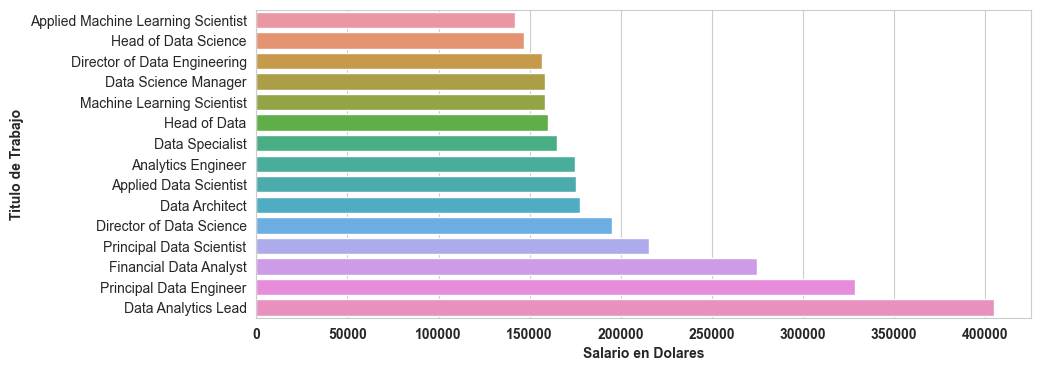

In [201]:
plt.figure(figsize=(10, 4))
sns.set_style("whitegrid")
sorted_jobs = df_salary.groupby('Titulo_de_trabajo')['Salario_en_dolares'].mean().sort_values().iloc[35:].index
sns.barplot(data=df_salary, y='Titulo_de_trabajo', x='Salario_en_dolares', order=sorted_jobs, orient= 'h', errorbar=None)
plt.xticks(weight = 'bold')
plt.xlabel('Salario en Dolares', fontweight='bold' )
plt.ylabel('Titulo de Trabajo', fontweight='bold')
plt.show

### Tamaño de la compañia

La información que presentamos aquí es un poco más compleja, por lo que intentaremos ser detallados. 

* En primer lugar, es importante destacar que el punto más alto del bigote en la caja de los datos de las compañías más pequeñas es inferior en comparación con las compañías medianas o grandes, lo que sugiere que, en general, las compañías pequeñas pagan salarios más bajos.

* No obstante, hay que tener en cuenta que las compañías grandes suelen tener outliers que presentan una cantidad bastante sobresaliente de salarios más altos. Esto se debe a que, a diferencia de las demás, las compañías grandes tienen más recursos para ofrecer salarios más altos a empleados con niveles de experiencia más altos. (Fuente: https://www.datacamp.com/blog/data-science-salaries)

* Por otro lado, podemos notar que el salario mínimo en las compañías grandes es más alto que en sus competidoras. No obstante, la media salarial en las compañías medianas es mayor. Estos resultados pueden deberse a diversos factores, como la complejidad de los trabajos, la competitividad del mercado laboral y la ubicación geográfica de las empresas.

* En general, los datos nos sugieren que las compañías grandes tienen mayores recursos para ofrecer salarios más altos, pero que las compañías medianas pueden ser más competitivas en términos de salarios medios. Es importante tener en cuenta que la interpretación de los datos puede estar influenciada por múltiples factores y que se necesitaría un análisis más profundo para confirmar estas hipótesis.


In [202]:
boxplot_company = df_salary.groupby('Tamanio_de_compania')['Salario_en_dolares'].median().loc[['S', 'M', 'L']].index
fig = px.box(df_salary, x='Tamanio_de_compania', y='Salario_en_dolares', 
             category_orders={'Tamanio_de_compania': boxplot_company},
             color_discrete_sequence=['#636EFA'],
             title='Salarios en función del tamaño de la compañía',
             labels={'Tamanio_de_compania': 'Tamaño de la compañía', 'Salario_en_dolares': 'Salario en dólares'})
fig.show()


### Tipo de contratacion

Podemos observar en este grafico, que el salario de los que estan bajo contrato son mas altos, sin embargo debemos tener en cuenta, de que nuestro conjunto de datos apenas tiene informacion sobre los diferentes tipos de contratacion a excepcion de "Full-time".


<function matplotlib.pyplot.show(close=None, block=None)>

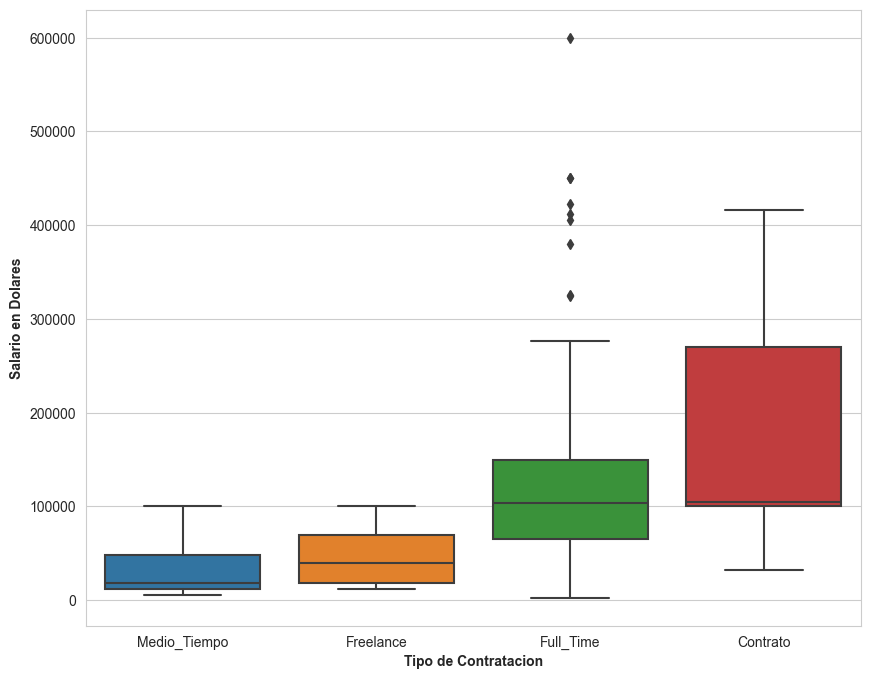

In [203]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.boxplot(data=df_salary, x='Tipo_de_contrato', y='Salario_en_dolares', order=['Medio_Tiempo','Freelance','Full_Time','Contrato'])
plt.xlabel('Tipo de Contratacion', fontweight='bold')
plt.ylabel('Salario en Dolares', fontweight='bold')
plt.show

### Salario por Residencia

En este caso vemos que los salarios se encuentras ubicados por residencia y de mayor a menor, hemos quitado los valores del conteo menor a 15, por que me estaba representando un sesgo de informacion
*  El salario en los Estados Unidos es el mas alto, superando los  los 140.000
*  El segundo puesto se lo atribuye a Canada, siguiendo a este Alemania

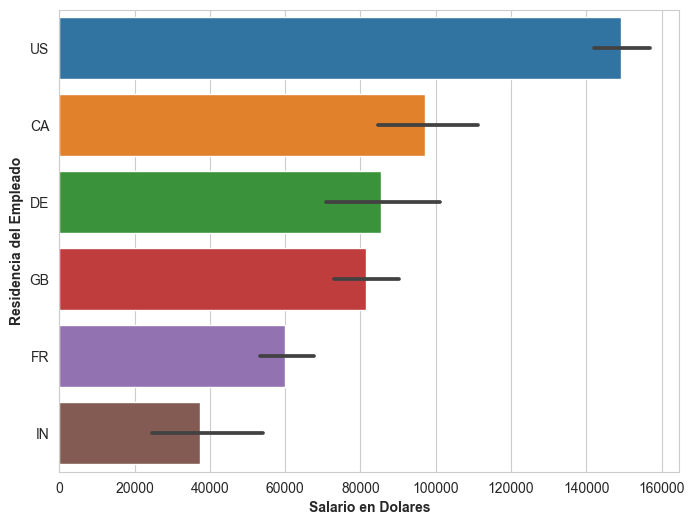

In [204]:
Conteo_residencia = df_salary["Residencia_del_empleado"].value_counts()
Categoria_interes = Conteo_residencia[Conteo_residencia > 15].index.tolist()
df_salary = df_salary[df_salary["Residencia_del_empleado"].isin(Categoria_interes)]



sorted_residence = df_salary.groupby('Residencia_del_empleado')['Salario_en_dolares'].mean().sort_values(ascending=False).head(10).index

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(data=df_salary, y='Residencia_del_empleado', x='Salario_en_dolares', order=sorted_residence, orient='h')
plt.xlabel('Salario en Dolares', fontweight='bold')
plt.ylabel('Residencia del Empleado', fontweight='bold')
plt.show()


## Conclusion 

Gracias a este análisis exploratorio, nos podemos dar cuenta de varias cosas.
<ol>
<li>La variable objetiva a querer predecir será Salario en Dólares, por su importancia y objetividad, además de su correlación que veremos próximamente

<li>Podemos sacar varias conclusiones, pero nos damos cuenta de que las variables más importantes las vemos en los niveles de experiencia, la localización del empleado y donde está ubicada la compañía

<li>Nuestros datos no son lineales, vemos mucha variedad en los datos

<li>Tenemos poca información en algunas columnas, que puede representar un problema el momento de realizar MachineLearning, como pueden ser la cantidad vista en el análisis uni variado, en donde en algunas columnas predominaban por una amplia mayoría datos de un tipo

<ol>


# 🧐Feature Selection

In [205]:
df_encoded.head()

,Salario_en_dolares,mas_experiencia,menos_experiencia,Anio_2022,Anterior_2022,Residencia_del_empleado_No_US,Residencia_del_empleado_US,Tamanio_de_compania_L,Tamanio_de_compania_M,Tamanio_de_compania_S
0,79833,0,1,0,1,1.00,0.00,1.00,0.00,0.00
1,260000,1,0,0,1,1.00,0.00,0.00,0.00,1.00
2,109024,1,0,0,1,1.00,0.00,0.00,1.00,0.00
3,20000,0,1,0,1,1.00,0.00,0.00,0.00,1.00
4,150000,1,0,0,1,0.00,1.00,1.00,0.00,0.00


### Método de filtro

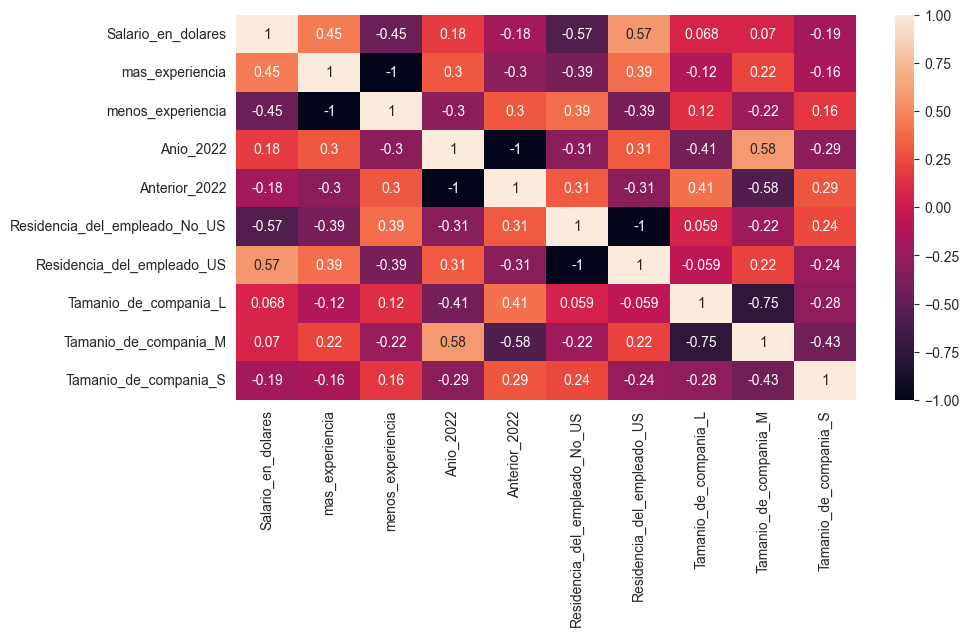

In [228]:
corrsalaryML=df_encoded.corr()
plt.figure(figsize=(10,5))
heatmap=sns.heatmap(corrsalaryML, annot=True)
sns.color_palette("flare", as_cmap=True)
plt.show()

Al aplicar el método de filtro, puedo observar las variables que presentan una mayor correlación con mi variable objetivo, en este caso, el "Salario en dólares", que será el valor a predecir. Al analizar las correlaciones de las variables, me percato de que puedo realizar dos predicciones.

Por un lado, puedo predecir el incremento salarial en función de los años de experiencia. Por otro lado, puedo evaluar el impacto de la residencia y la ubicación de la empresa en relación con el nivel de experiencia, y así calcular el salario aproximado para un residente de Argentina, con un nivel junior de experiencia, que trabaje para una empresa en Estados Unidos. Me centraré en estas dos premisas para el desarrollo de este trabajo.

Para este trabajo en particular, seleccionaré estas variables.



# 💻Machine Learning

In [207]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.ensemble import  AdaBoostRegressor
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from imblearn.over_sampling import SMOTE


## Random forest

### Random forest mejorado, con grafico.

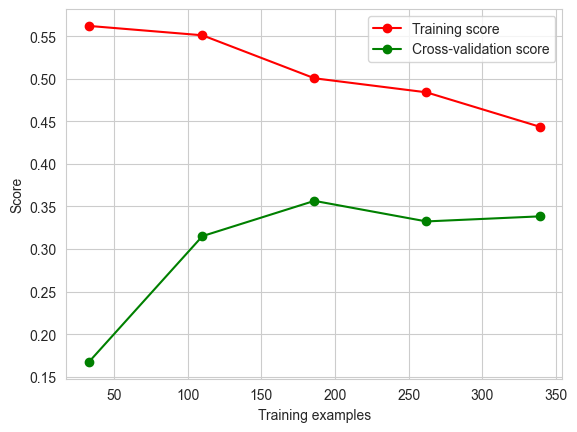

Métricas en los datos de entrenamiento:
R²: 0.4341336869914446
MSE: 2925028775.6957307
RMSE: 54083.535162706685
Métricas en los datos de prueba:
R²: 0.47122512445789777
MSE: 2477239981.562171
RMSE: 49771.879425657324


In [220]:
X = df_encoded.drop('Salario_en_dolares', axis=1)
y = df_encoded['Salario_en_dolares']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)


train_sizes, train_scores, val_scores = learning_curve(rf_model, X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color="g",
             label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()

# Calcular las métricas de evaluación en los datos de entrenamiento y prueba
print('Métricas en los datos de entrenamiento:')
print('R²:', r2_score(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))

print('Métricas en los datos de prueba:')
print('R²:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))




RandomForestR2_train = r2_score(y_train, y_train_pred)
RandomForestMSE_train = mean_squared_error(y_train, y_train_pred)
RandomForestRMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))


RandomForestR2_test = r2_score(y_test, y_test_pred)
RandomForestMSE_test = mean_squared_error(y_test, y_test_pred)
RandomForestRMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

## XGBoost

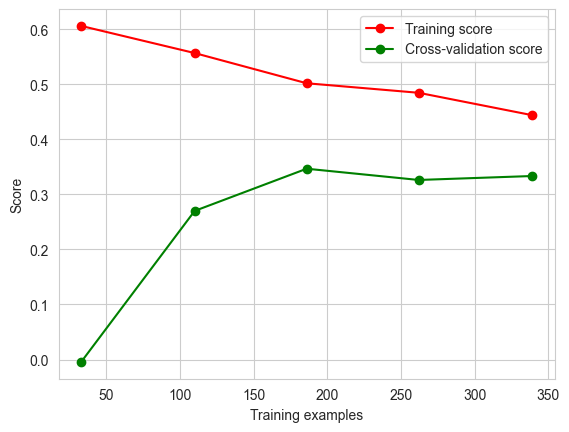

Métricas en los datos de entrenamiento:
R²: 0.43423591084527424
MSE: 2924500368.7078247
RMSE: 54078.64984176125
Métricas en los datos de prueba:
R²: 0.46934155204676686
MSE: 2486064267.852698
RMSE: 49860.447930726594


In [227]:
X = df_encoded.drop('Salario_en_dolares', axis=1)
y = df_encoded['Salario_en_dolares']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

XGBoost = xgb.XGBRegressor(n_estimators=500, random_state=42)
XGBoost.fit(X_train, y_train)

y_train_pred = XGBoost.predict(X_train)
y_test_pred = XGBoost.predict(X_test)


train_sizes, train_scores, val_scores = learning_curve(XGBoost, X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color="g",
             label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()

# Calcular las métricas de evaluación en los datos de entrenamiento y prueba
print('Métricas en los datos de entrenamiento:')
print('R²:', r2_score(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))

print('Métricas en los datos de prueba:')
print('R²:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))




XGBoostR2_train = r2_score(y_train, y_train_pred)
XGBoostMSE_train = mean_squared_error(y_train, y_train_pred)
XGBoostRMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

XGBoostR2_test = r2_score(y_test, y_test_pred)
XGBoostMSE_test = mean_squared_error(y_test, y_test_pred)
XGBoostRMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

### GridSearch XGBoost

In [229]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

X = df_encoded.drop('Salario_en_dolares', axis=1)
y = df_encoded['Salario_en_dolares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = xgb.XGBRegressor(random_state=42)

# Definir los hiperparámetros a explorar en la cuadrícula
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Entrenar el mejor modelo con los datos de entrenamiento completos
best_model.fit(X_train, y_train)

# Calcular las predicciones en el conjunto de entrenamiento y prueba
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calcular las métricas de evaluación en los datos de entrenamiento y prueba
print('Métricas en los datos de entrenamiento:')
print('R²:', r2_score(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))

print('Métricas en los datos de prueba:')
print('R²:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))


Métricas en los datos de entrenamiento:
R²: 0.4304474872944738
MSE: 2944083170.5920696
RMSE: 54259.40628676349
Métricas en los datos de prueba:
R²: 0.4818208217765635
MSE: 2427600548.51721
RMSE: 49270.686503409


## GradientBoostingRegressor

Métricas en los datos de entrenamiento:
R²: 0.4336489155037734
MSE: 2927534615.8888607
RMSE: 54106.69659006046
Métricas en los datos de prueba:
R²: 0.4718681474774411
MSE: 2474227504.217357
RMSE: 49741.6073746854


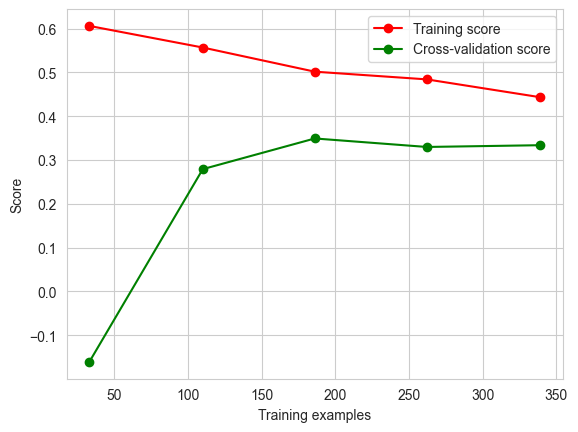

In [223]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear una instancia del GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=1000, random_state=85)

# Ajustar el modelo a los datos de entrenamiento
gbr.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Calcular las métricas de evaluación en los datos de entrenamiento y prueba
print('Métricas en los datos de entrenamiento:')
print('R²:', r2_score(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))

print('Métricas en los datos de prueba:')
print('R²:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Generar el gráfico de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(gbr, X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color="g", label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()

GradientBoostRegressorr2_train = r2_score(y_train, y_train_pred)
GradientBoostRegressormse_train = mean_squared_error(y_train, y_train_pred)
GradientBoostRegressorrmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

GradientBoostRegressorr2_test = r2_score(y_test, y_test_pred)
GradientBoostRegressormse_test = mean_squared_error(y_test, y_test_pred)
GradientBoostRegressorrmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

## Conclusion

# ✅ Valoracion de Algoritmos

## Grafico R2

En este caso, realice un grafico que comprara distintos modelos de regresion para mis datos. Puedo notar que mi random forest, con un tamaño del 5% de los datos de testeo, es el que tiene una mejora con respecto a sus competidores. El XGBoost con un tamaño del 10% y uno con el 20% no marca tanto la diferencia, pero si se ponen por encima, o en valores iguales que el random forest al 20%. <br>
Puedo concluir que actualmente, dada la cantidad de conocimiento que tengo (aun que queda por debatir o mejorar si el random forest presenta casos de adaptamiento, o overfitting) y el conocimiento actual de los modelos que conozco, me convendria realizarlo tanto por random forest, como por XGBoost.

In [226]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una lista con los nombres de los modelos
model_names = ['Random Forest Train', 'Random Forest Test','XGBoost Train','XGBoost Test', 'GradientBoost Train', 'GradientBoost Test']

# Crear una lista con los errores de cada modelo
r2 = [RandomForestR2_train, RandomForestR2_test, XGBoostR2_train, XGBoostR2_test, GradientBoostRegressorr2_train, GradientBoostRegressorr2_test] # Reemplazar rf_error, ab_error, xgb_error con los valores de error obtenidos para cada modelo

# Crear un gráfico de barras

fig = px.bar(x=model_names, y=r2, width=1200, height=600, color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_xaxes(title_text="Modelos")
fig.update_yaxes(title_text="Coeficiente de determinación (R^2)")


## Grafico MSE

In [225]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una lista con los nombres de los modelos
model_names = ['Random Forest Train', 'Random Forest Test', 'XGBoost Train','XGBoost Test', 'GradientBoostRegressormse_Train', 'GradientBoostRegressormsr_Test']


# Crear una lista con los errores de cada modelo
errors = [RandomForestMSE_train, RandomForestMSE_test, XGBoostMSE_train, XGBoostMSE_test, GradientBoostRegressormse_train, GradientBoostRegressormse_test] # Reemplazar rf_error, ab_error, xgb_error con los valores de error obtenidos para cada modelo


fig = px.bar(x=model_names, y=errors, width=1200, height=600, color_discrete_sequence=px.colors.sequential.Viridis )
fig.update_xaxes(title_text="Modelos")
fig.update_yaxes(title_text="Coeficiente de Error MSE")

## Grafico RMSE

In [224]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una lista con los nombres de los modelos
model_names = ['Random Forest Train', 'Random Forest Test', 'XGBoost Train','XGBoost Test', 'GradientBoostRegressor_Train', 'GradientBoostRegressor_Test']


# Crear una lista con los errores de cada modelo
errorsR = [RandomForestRMSE_train, RandomForestRMSE_test, XGBoostRMSE_train, XGBoostRMSE_test, GradientBoostRegressorrmse_train, GradientBoostRegressorrmse_test] # Reemplazar rf_error, ab_error, xgb_error con los valores de error obtenidos para cada modelo


fig = px.bar(x=model_names, y=errorsR, width=1200, height=600, color_discrete_sequence=px.colors.sequential.Viridis )
fig.update_xaxes(title_text="Modelos")
fig.update_yaxes(title_text="Coeficiente de Error RMSE")